# Logistic Regression

Logistic regression is a type of regression analysis used to model the probability of a binary outcome (i.e., yes or no, 1 or 0). Based on one or more inputt factors, it is used to forecast the chance that an event will occur. The likelihood of the event occurring, which can range from 0 to 1, is the logistic regression's output.

### How it Works
- **Linear Model**: The input features are multiplied by weights and summed up to form a linear combination.
- **Sigmoid Activation**: The linear result is passed through the sigmoid function, which maps the output to a probability between 0 and 1.
- **Decision Boundary**: Based on a threshold (usually 0.5), the model classifies inputs into one of the two classes.

### Applications of Logistic Regression
- Medical Diagnosis: Predicting the likelihood of a disease (e.g., cancer vs. non-cancer).
- Customer Churn Prediction: Identifying if a customer will leave a service.
- Spam Detection: Classifying emails as spam or not spam.
- Credit Scoring: Determining whether a loan applicant is likely to default or not.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
data = {
    'age': [22, 25, 47, 52, 46, 59, 24, 35, 39, 60, 33, 28, 55, 29, 40, 50, 43, 45, 36, 38],
    'bought_insurance': [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
}

In [6]:
df = pd.DataFrame(data)
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,1
4,46,1


In [7]:
from sklearn.model_selection import train_test_split

# Define the features and target
X = df[['age']]  # Feature: age
y = df['bought_insurance']  # Target: bought_insurance

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,age
8,39
5,59
11,28
3,52
18,36


In [8]:
X_test

,age
0,22
17,45
15,50
1,25


In [9]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

c:\Users\biruk.getaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


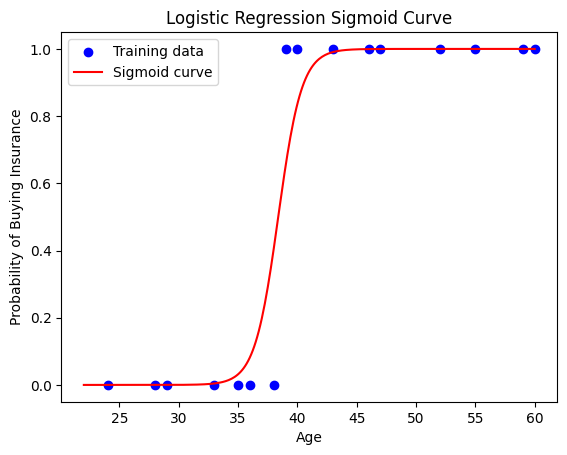

In [10]:
# Generate a range of ages for plotting the sigmoid curve
age_range = np.linspace(X['age'].min(), X['age'].max(), 300).reshape(-1, 1)

# Compute the probabilities (sigmoid values) for each age in the range
probabilities = model.predict_proba(age_range)[:, 1]

# Plot the data points
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot the sigmoid curve
plt.plot(age_range, probabilities, color='red', label='Sigmoid curve')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Probability of Buying Insurance')
plt.title('Logistic Regression Sigmoid Curve')
plt.legend()
plt.show()


In [11]:
# Predict on the test set
y_pred = model.predict(X_test)

# Display predictions
print("Predictions on the test set:")
for i in range(len(X_test)):
    print(f"Age: {X_test.iloc[i].values[0]}, Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")

Predictions on the test set:
Age: 22, Actual: 0, Predicted: 0
Age: 45, Actual: 1, Predicted: 1
Age: 50, Actual: 1, Predicted: 1
Age: 25, Actual: 0, Predicted: 0


In [12]:
from sklearn.metrics import accuracy_score

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}") 

Accuracy: 1.00
